<a href="https://colab.research.google.com/github/itssofiarce/MINERIA/blob/tp1/tp1_2024/TP1_Mineria_Arce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico Minería de Datos 2024
## Docentes
- Spetale, Flavio
- Pellerejo, Ivan
- Gatti, Ramiro

## Integrante
- Sofía Arce


# Preparacion del entorno

In [6]:
import os

REPO_NAME = "MINERIA"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/itssofiarce/MINERIA.git
  os.chdir(REPO_NAME)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Librerías

In [7]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset:

In [8]:
data = pd.read_csv('/content/MINERIA/tp1_2024/dxCropRecommendation.csv')

# Información del Dataset


In [9]:
data.head()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia,Cultivo
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Arroz
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Arroz
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Arroz
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Arroz
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Arroz


In [10]:
# Nombre y total de columnas
print("El dataset tiene:")
columns = data.columns
ncolumns = len(columns)
print(f"{ncolumns} columnas: {', '.join(columns)}")

# Total de filas
nrows = len(data)
print(f"{nrows} filas")

# Valores y rangos
unq_val = {col: data[col].unique() for col in data.columns}
tip_val = data.dtypes

table_data = []
for col, values in unq_val.items():
    dtype = tip_val[col]
    if len(values) > 50:
        # En caso de que haya mas de 50 datos únicos, muestro solamente los primeros 50
        values_to_display = list(values[:50])
        values_display = ', '.join(map(str, values_to_display))
    else:
        values_display = ', '.join(map(str, values))

    table_data.append([col, dtype, values_display])

# Print the table
print(tabulate(table_data, headers=["Column", "Data Type", "Unique Values"], tablefmt="grid"))

El dataset tiene:
8 columnas: Nitrogeno, Fosforo, Potasio, Temperatura, Humedad, pH, Lluvia, Cultivo
1600 filas
+-------------+-------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Column      | Data Type   | Unique Values                                                                                                                                                                     

Descripción de las columnas
* Nitrogeno: Proporcion de Nitrogeno en el suelo (mg/kg)
* Fosforo: Proporcion de Fosforo en el suelo (mg/kg)
* Potasio: Proporcion de Potasio en el suelo (mg/kg)
* Temperatura: Temperatura registrada en grados celsius
* Humedad: porcentaje de humedad registrada
* pH: valor de ph registrado en el suelo
* Lluvia: lluvia registrada en mm
* Cultivo: nombre de la semilla


# Analisis Exploratorio



### Nulos


In [11]:
data.isnull().sum()

,0
Nitrogeno,0
Fosforo,0
Potasio,0
Temperatura,0
Humedad,0
pH,0
Lluvia,0
Cultivo,0


El dataset no contiene registros con valores nulos

### Descripción de las columnas numéricas

In [12]:
data.describe()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,52.003750,53.145000,57.455625,25.627031,75.299276,6.474024,104.126884
std,35.697954,37.949247,56.440856,5.384785,20.534713,0.658380,56.235890
min,0.000000,5.000000,5.000000,8.825675,14.258040,4.507524,20.211267
25%,23.000000,22.750000,25.000000,22.481574,63.675620,6.034347,66.697864
50%,39.000000,47.000000,40.000000,25.662093,82.281131,6.423214,97.318949
75%,86.000000,71.000000,53.000000,28.568738,91.337228,6.873499,117.947585
max,120.000000,145.000000,205.000000,43.675493,99.981876,8.868741,298.560117


### Outliers

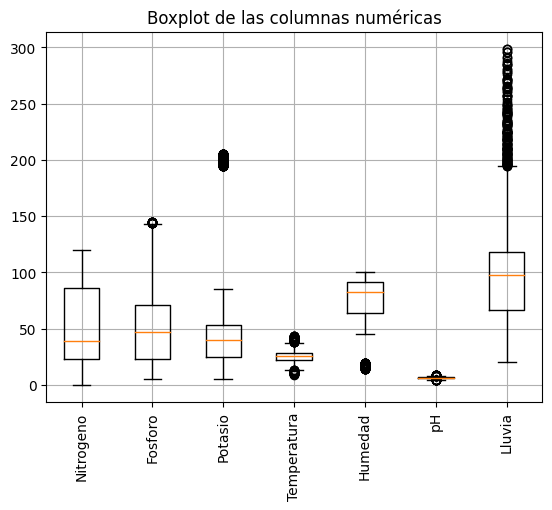

In [13]:
# Now you can create the boxplot.
fig, ax = plt.subplots()
ax.boxplot(data.iloc[:, :-1])
plt.xticks(range(1, len(data.columns)), data.iloc[:, :-1].columns, rotation=90)

plt.title("Boxplot de las columnas numéricas")
plt.grid(True)
plt.show()

Segun el gráfico superior, todas las variables numéricas tienen valores atípicos excepto los valores de Nitrógeno y los de Potasio. A continuación estudiaré la distribución de las variables numéricas.

In [14]:
columnas_numericas = data.select_dtypes(['int', 'float']).columns
from scipy import stats
for num_col in columnas_numericas:
    _, pval = stats.normaltest(data[num_col])
    if(pval < 0.05):
        print(f"Columna {num_col} no sigue una distribución normal. P-value: {pval}")

Columna Nitrogeno no sigue una distribución normal. P-value: 0.0
Columna Fosforo no sigue una distribución normal. P-value: 1.3109037846248255e-37
Columna Potasio no sigue una distribución normal. P-value: 2.6232179657523847e-117
Columna Temperatura no sigue una distribución normal. P-value: 4.9403553135254025e-12
Columna Humedad no sigue una distribución normal. P-value: 4.24078863412994e-80
Columna pH no sigue una distribución normal. P-value: 1.3792768490363843e-10
Columna Lluvia no sigue una distribución normal. P-value: 4.343708122701068e-56


Con un nivel de confianza del 95% descartamos la normalidad para las variables

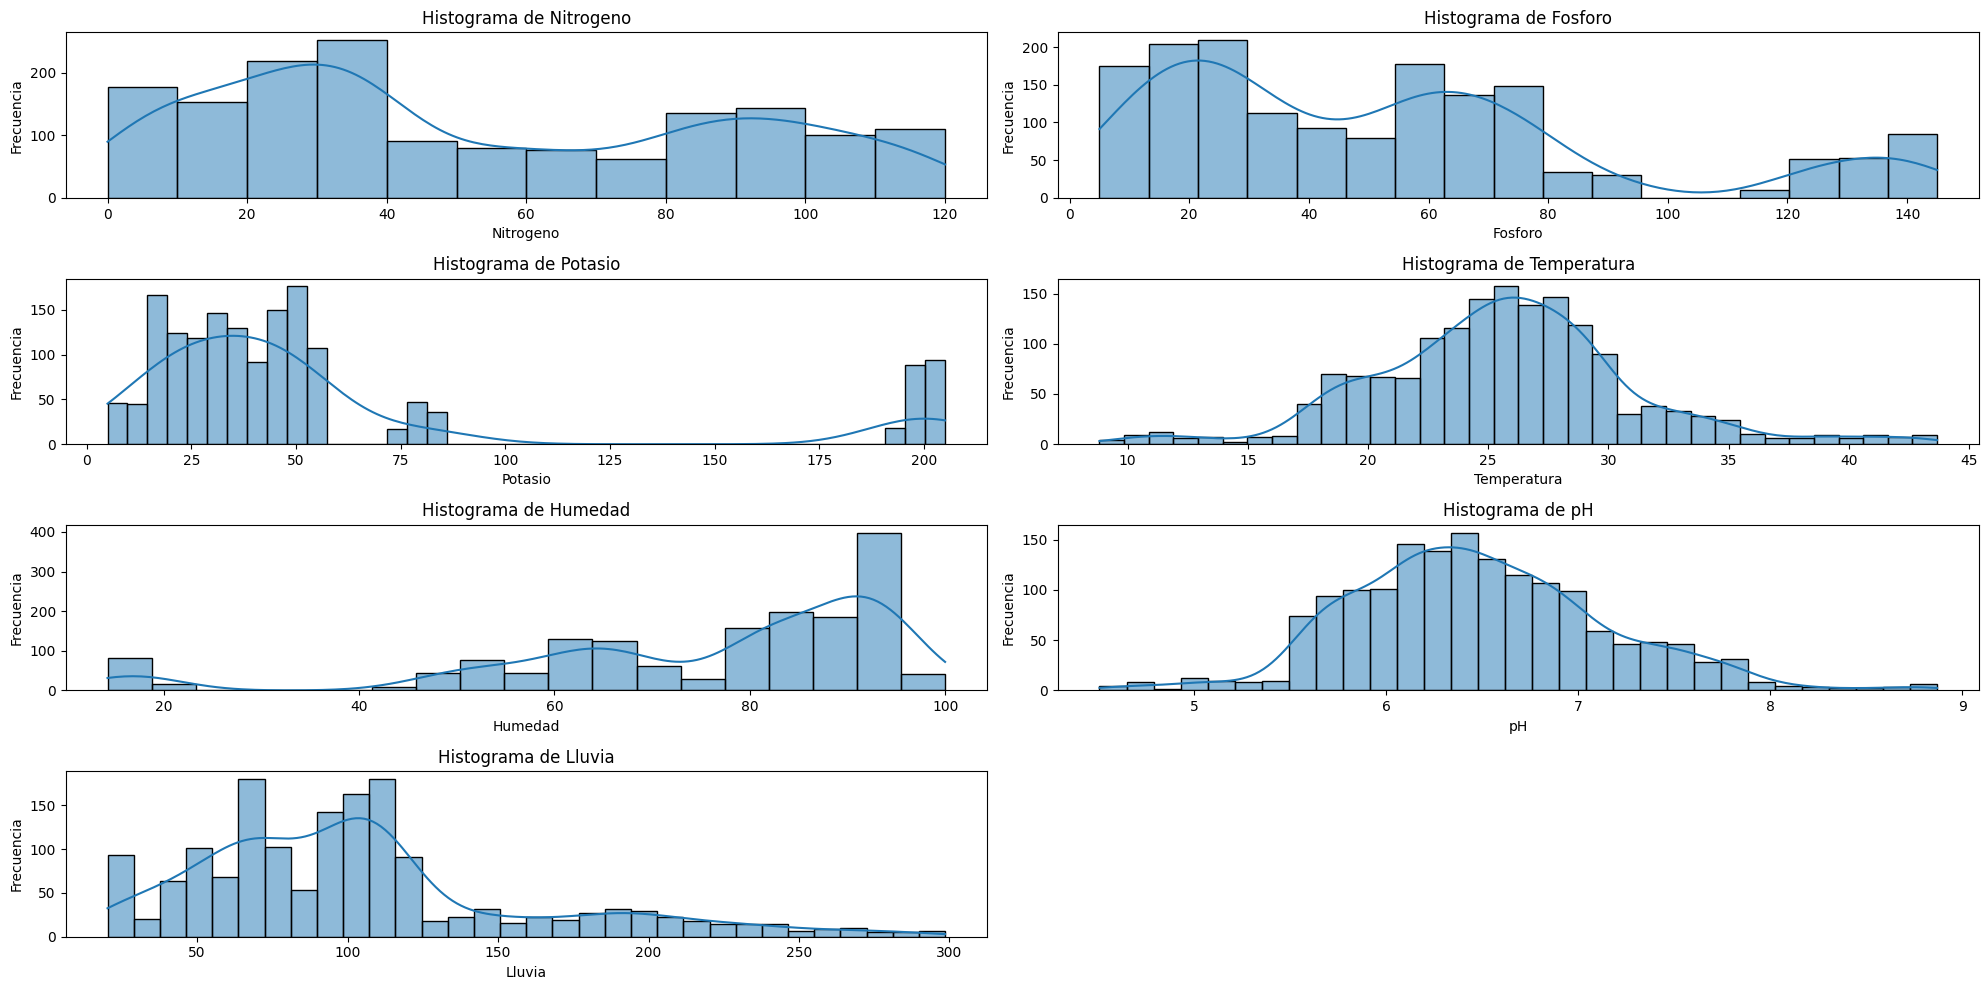

In [15]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(data.iloc[:,:-1], 1):
    plt.subplot(4, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Observando los gráficos de arriba, las distribuciones de pH y temperatura concentran la mayoría de los datos en en centro. La distribución de la lluvia es asimetrica hacia la derecha mientras que la de la humedad es asimentrica hacia la izquierda.

## Correlación de las variables por semilla

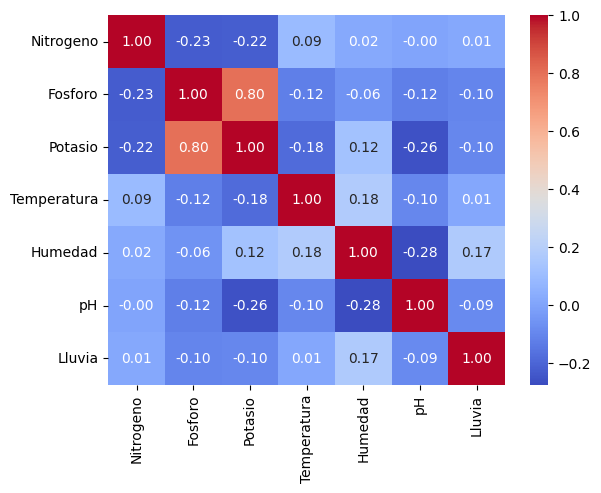

In [16]:
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Las variables con mayor correlación positiva son el Fósforo y el Potasio.

## Estandarización
Los datos serán normalizados mediante la tecnica de Z-Score:
Esta tecnica escala cada feature restando su media y la divide por su desvio estandar, esto genera que todos tengan media = 0 y desvio estandar = 1

In [19]:
data_num = data.drop(columns=['Cultivo'])
std_data = (data_num - data_num.mean()) / data_num.std()

In [20]:
std_data.describe()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia
count,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03
mean,8.881784e-17,-7.993606e-17,7.105427e-17,-4.085621e-16,-7.105427e-17,-9.769963e-16,8.881784e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.456771e+00,-1.268668e+00,-9.293910e-01,-3.120153e+00,-2.972588e+00,-2.986876e+00,-1.492208e+00
25%,-8.124765e-01,-8.009382e-01,-5.750378e-01,-5.841378e-01,-5.660491e-01,-6.678163e-01,-6.655718e-01
50%,-3.642716e-01,-1.619268e-01,-3.092729e-01,6.511365e-03,3.400026e-01,-7.717530e-02,-1.210603e-01
75%,9.523305e-01,4.704968e-01,-7.894326e-02,5.463000e-01,7.810166e-01,6.067526e-01,2.457630e-01
max,1.904766e+00,2.420470e+00,2.614141e+00,3.351752e+00,1.201994e+00,3.637284e+00,3.457458e+00


# PCA

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=std_data.shape[1], random_state=0)

pca_features = pca.fit_transform(std_data)

In [48]:
# PC dataframe
pca_df = pd.DataFrame(
data=pca_features,
columns=std_data.columns)

nuevos_nombres = {'Nitrogeno': 'PC1',
'Potasio': 'PC2',
'Fosforo': 'PC3',
'Temperatura': 'PC4',
'Humedad': 'PC5',
'pH': 'PC6',
'Lluvia': 'PC7'}
pca_df.rename(columns=nuevos_nombres, inplace=True)

# Agrego la columna de los cultivos
pca_df['Cultivo'] = data['Cultivo']


In [49]:
pca_df

,PC1,PC3,PC2,PC4,PC5,PC6,PC7,Cultivo
0,-0.678951,-0.601755,1.507438,-1.363936,0.492945,-0.237963,0.047793,Arroz
1,-0.655848,-0.269735,1.834465,-1.062965,1.217065,-0.690832,0.230752,Arroz
2,-0.841105,0.087574,2.591970,-0.178076,1.839903,-1.413305,-0.008477,Arroz
3,-1.132942,-0.755690,1.748028,-0.370653,1.472122,-0.427959,-0.256326,Arroz
4,-1.054541,0.063597,2.683366,-0.901397,1.456863,-1.259718,-0.130633,Arroz
...,...,...,...,...,...,...,...,...
1595,-1.365955,-0.212794,0.474787,-1.111702,1.257661,0.008154,-0.202548,Cafe
1596,-1.387999,-0.219025,-0.265384,-0.999442,0.398858,1.055242,-0.423702,Cafe
1597,-1.253562,-0.404796,0.508306,-1.719475,0.802697,0.331929,-0.076770,Cafe
1598,-1.369752,0.525975,-0.288402,-1.382009,1.033021,0.355344,-0.318728,Cafe


Eigenvector y Eigenvalues

Selección del numero de componentes principales.

In [42]:
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [50]:
var_c = acumular(pca.explained_variance_ratio_)

# Creo mi feature vector
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 'Proporción de variancia explicada':pca.explained_variance_ratio_, 'Proporción acumulado de variancia explicada': var_c})

In [52]:
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,2.033252,0.290465,0.290465
1,1.463386,0.209055,0.499520
2,1.002329,0.143190,0.642710
3,0.894735,0.127819,0.770529
4,0.746828,0.106690,0.877219
5,0.691301,0.098757,0.975976
6,0.168169,0.024024,1.000000


En cuanto a la proporción de varianza explicada elijo las 4 primeras componentes porque llegan a explicar mas del 75% de los datos.

Teniendo en cuenta la regla de Kaiser (eigenvalues > 1) tambien se toman las primeras 4 variables.

No tomo las 4 primeras componentes ya que el enunciado pide un grafico en 2D y se puede graficar hasta 4D

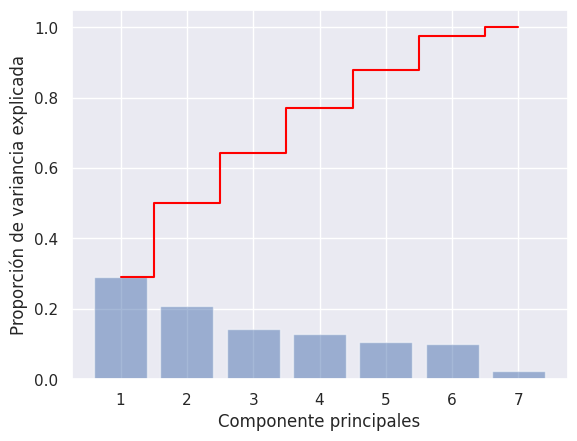

In [53]:
plt.bar(range(1,8), pca.explained_variance_ratio_,
alpha=0.5,
align='center')
plt.step(range(1,8), np.cumsum(pca.explained_variance_ratio_),
where='mid',
color='red')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

In [89]:
# prompt: calcular los eigen values de las tres primeras componentes

eigenvalues_top3 = pca.explained_variance_[:3]
print("Eigenvalues de las tres primeras componentes:")
print(eigenvalues_top3)


Eigenvalues de las tres primeras componentes:
[2.03325154 1.46338602 1.00232937]


**Criterios de selección:**
* Proporción de variancia acumulada (~75% -80%)​
* Criterio de Kaiser (eigenvalues > 1)​
* Gráfico del codo (Scree)

Las tres primeras componentes acumulan el 65% de la variabilidad total, es decir, **no** están cercanas a cumplir con el primer criterio (>~75%). Sin embargo, son las únicas cuyos eigenvalues son superiores a 1 (Criterio de Kaiser).

In [86]:
import plotly.express as px

# Suponiendo que pca_df tiene las columnas 'PC1', 'PC2' y 'Cultivo'
fig = px.scatter(pca_df, x='PC1', y='PC2', color='Cultivo', title='PCA en 2D')
fig.show()


Agregar conclusión de PCA para todas esas variables

In [39]:
pca_df

,PC1,PC3,PC2,PC4,PC5,PC6,Lluvia
0,-0.678951,-0.601755,1.507438,-1.363936,0.492945,-0.237963,0.047793
1,-0.655848,-0.269735,1.834465,-1.062965,1.217065,-0.690832,0.230752
2,-0.841105,0.087574,2.591970,-0.178076,1.839903,-1.413305,-0.008477
3,-1.132942,-0.755690,1.748028,-0.370653,1.472122,-0.427959,-0.256326
4,-1.054541,0.063597,2.683366,-0.901397,1.456863,-1.259718,-0.130633
...,...,...,...,...,...,...,...
1595,-1.365955,-0.212794,0.474787,-1.111702,1.257661,0.008154,-0.202548
1596,-1.387999,-0.219025,-0.265384,-0.999442,0.398858,1.055242,-0.423702
1597,-1.253562,-0.404796,0.508306,-1.719475,0.802697,0.331929,-0.076770
1598,-1.369752,0.525975,-0.288402,-1.382009,1.033021,0.355344,-0.318728


El 6 7 y 8 se hace con el subconjunto de 8 clases

# ISOMAP

In [57]:
from sklearn.manifold import Isomap

In [68]:
isomap_df = Isomap(n_neighbors=200, n_components=3)
isomap_df.fit(std_data)
projections_isomap = isomap_df.transform(std_data)

In [85]:
#### MIRAR ESTO COÓMO SE HIZO EL EL PLOTEO DE LOS DATOS POREQUE SE HIZO CON GEMINI

import plotly.express as px

isomap_df = Isomap(n_neighbors=200, n_components=2)
isomap_df.fit(std_data)
projections_isomap = isomap_df.transform(std_data)

# Create a DataFrame with the Isomap projections and the 'Cultivo' column
isomap_plot_df = pd.DataFrame(projections_isomap, columns=['Dimension 1', 'Dimension 2'])
isomap_plot_df['Cultivo'] = data['Cultivo']

# Create a 2D scatter plot using Plotly
fig = px.scatter(isomap_plot_df, x='Dimension 1', y='Dimension 2', color='Cultivo',
                  title='Isomap 2D Projection of Crop Recommendation Data')
fig.show()


CORREGIR TEMA INCDICES DEL GRÁFICO DE ARRIBA

# t-SNE

In [82]:
from sklearn.manifold import TSNE
import plotly.express as px

In [83]:
tsne = TSNE(n_components=2, random_state=0, perplexity=45, n_iter=1000)
projections_tsne = tsne.fit_transform(std_data, )
fig = px.scatter(
projections_tsne, x=0, y=1, #z=2,
color=data['Cultivo'], labels={'color': 'class'}
)
fig.update_traces(marker_size=5)
fig.show()

# K-Means

In [90]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

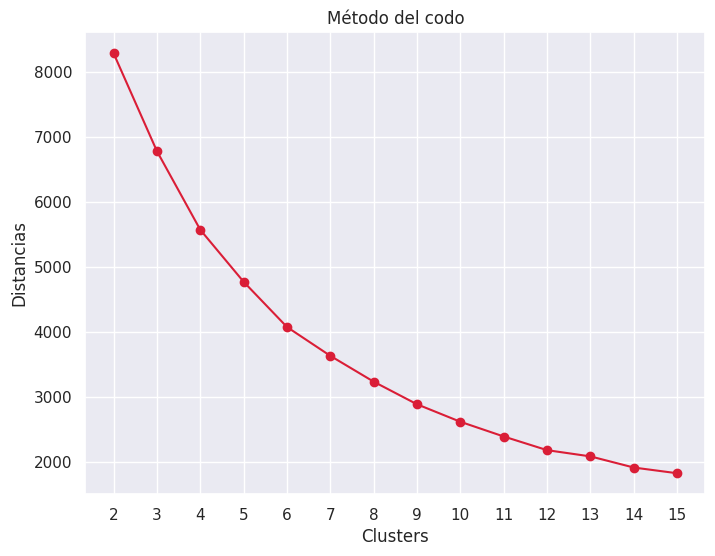

In [94]:
distancias = []
for k in range(2, 16):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(std_data)
  distancias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 16), distancias, marker='o', color = '#da1e37')
plt.title('Método del codo')
plt.xlabel('Clusters')
plt.ylabel('Distancias')
plt.xticks(np.arange(2, 16))
plt.grid(True)
plt.show(block=True)

Según el gráfico de arriba, la cantidad ideal de clusters para este problema podría ser de 6. A partir de ese número la inercia comienza a disminuir.